In [1]:
import numpy as np

from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras import optimizers 
import matplotlib.pyplot as plt
#=-0.2*(A1^3)-3.6*(A1^2)-4.9*A1

In [13]:
data = np.loadtxt("R_data.csv", delimiter=",", dtype=np.int32) 
x_train = data[:, 0:3]
y_train = np.array([-1 if x == -300 else 0 if x == 0 else 1 for x in data[:, 4]] )
print(y_train[0:100])

[ 0  1  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  1  1
  1  0  0  0  1  1  1  1  1  1  1  1  0  0  0  0  0  0  1  1  1  1  1  1
  1  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  1  1  1
  1  1  1  1]


In [63]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=3))
model.add(Dense(1000, activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(300, activation='sigmoid'))
#model.add(Dense(500, activation='relu'))
#model.add(Dense(100,activation='tanh'))
#model.add(Dense(100, activation='relu'))

model.add(Dense(1))

In [68]:
sgd=optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=sgd, loss='mean_squared_error') 
model.summary()
history = model.fit(x_train, y_train, epochs=5000, batch_size=256) 

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 100)               400       
                                                                 
 dense_96 (Dense)            (None, 1000)              101000    
                                                                 
 dense_97 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 102,401
Trainable params: 102,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
3/3 [==============================] - 0s 4ms/step - loss: 0.1013
Epoch 2/5000
3/3 [==============================] - 0s 8ms/step - loss: 0.1026
Epoch 3/5000
3/3 [==============================] - 0s 6ms/step - loss: 0.0948
Epoch 4/5000
3/3 [==============================] - 0s 6ms/step - loss: 0.

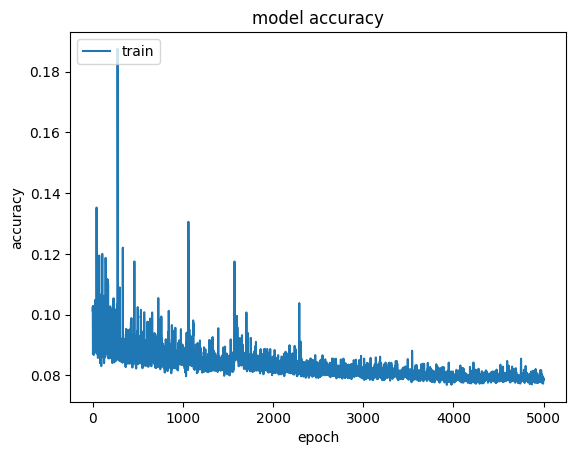

In [69]:

plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

19/19 [==============================] - 0s 1ms/step
[[ 3.20541561e-01]
 [ 3.20541561e-01]
 [ 3.20541561e-01]
 [ 5.09170473e-01]
 [ 5.09170473e-01]
 [ 9.76617396e-01]
 [ 9.78941143e-01]
 [ 9.26958025e-01]
 [ 9.91845906e-01]
 [ 9.99129713e-01]
 [ 1.01412797e+00]
 [ 9.89444196e-01]
 [ 1.00842690e+00]
 [ 9.78029072e-01]
 [ 9.92253006e-01]
 [ 9.74708140e-01]
 [ 9.95790541e-01]
 [ 1.00357616e+00]
 [ 9.80583847e-01]
 [ 9.91425931e-01]
 [ 8.99961889e-01]
 [ 9.59384620e-01]
 [ 9.78941143e-01]
 [ 8.96166503e-01]
 [ 9.32384908e-01]
 [ 9.39119756e-01]
 [ 9.17999685e-01]
 [ 9.99325335e-01]
 [ 8.88749063e-01]
 [ 8.97778332e-01]
 [-4.87451315e-01]
 [ 9.19858396e-01]
 [ 9.35817897e-01]
 [ 9.62190568e-01]
 [ 9.62190568e-01]
 [ 5.07237971e-01]
 [ 5.07237971e-01]
 [-6.49799556e-02]
 [-6.67518824e-02]
 [-6.67518824e-02]
 [-3.32944393e-02]
 [-2.07889661e-01]
 [ 2.17742696e-01]
 [ 2.17742696e-01]
 [-2.80945480e-01]
 [ 4.01894271e-01]
 [ 4.01894271e-01]
 [ 2.17742696e-01]
 [ 4.62098360e-01]
 [ 4.62098360e-0

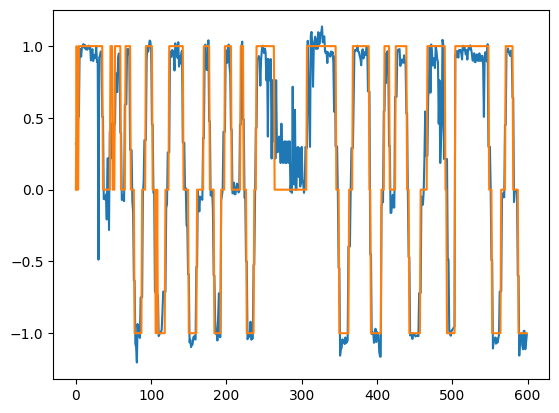

In [70]:
y_predict = model.predict(x_train) 
plt.plot(y_predict)
plt.plot(y_train)
print(y_predict)
#print(model.predict(np.array([[1.2]])))

In [71]:
model.save("FBR.h5")